In [34]:
# 출처 : http://hleecaster.com/ml-knn-classifier-example/
# 제목은 KNN In Elyon 이나... 내맘같이 풀리지 않아 예제로 대체함 ㅜㅜ


In [20]:
import sys
sys.path.append('/home/yam/notebook/project/air/azkaban')
import requests
import json
import os 
from os import environ
import pandas as pd
import subprocess

from fact_util.azkaban import Azkaban

rootPath = '/home/yam/notebook/project/air/azkaban'

batch_type = 'd'
yyyymmdd = '20200129'
service_country='KR'
build = 'SURPPORT2'
planetid = '300'

if service_country == 'TH':
    s3aRootR = 's3a://bluehole-air-live-th'
    s3RootR = 's3://bluehole-air-live-th'
elif service_country == 'KR_CBT2':
    s3aRootR = 's3a://bluehole-air-test-kr'
    s3RootR = 's3://bluehole-air-test-kr'
else:
    s3aRootR = 's3a://bluehole-air-live-th'
    s3RootR = 's3://bluehole-air-live-th'

azkaban = Azkaban(rootPath, batch_type, yyyymmdd, service_country, s3aRootR, s3RootR, build)

def df(query):
    data = azkaban.runQuery(query)
    columns = [x[0] for x in data[0]]
    dataframe = pd.DataFrame(data[1],columns = columns)
    return dataframe.loc[:,[not x.startswith('na_') for x in columns]]
   # return dataframe
    

In [21]:
# sklearn에서 제공하는 예시 데이터 중 유방암 데이터를 사용
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [22]:
# pandas의 데이터 프레임의 형태로 바꿔서 확인
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [23]:
#  악성(malignant), 양성(benign)
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [24]:
# 각 컬럼의 편차가 크기 때문에 정규화를 해줌
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

In [25]:
df_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
for x in range(len(df_data.columns)):
    df_data[x] = min_max_normalize(df_data[x])
df_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [27]:
# 데이터 세트 분리 (Training & Validation)
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(df_data, df_labels, test_size = 0.2, random_state = 100)

In [28]:
print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(validation_labels))

455
114
455
114


In [29]:
# K를 3으로 하고 모델 생성
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [30]:
#  위에서 나눠놓은 학습 데이터 세트(training_data, training_labels)로 학습
classifier.fit(training_data, training_labels)

/home/yam/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [31]:
# 모델의 정확도 평가
print(classifier.score(validation_data, validation_labels))

0.9649122807017544


/home/yam/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/yam/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/yam/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/yam/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

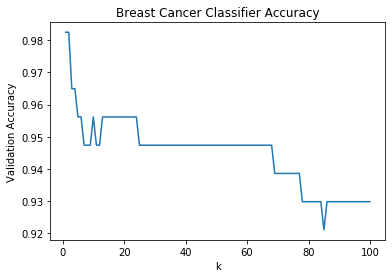

In [32]:
# 모델의 정확도를 시각화
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [33]:
print("테스트 세트 예측: {}".format(classifier.predict(validation_data)))

테스트 세트 예측: [0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 1]
